### SQL database Examples ###

We'll use some basic python to learn about SQL queries, creation and general hygeine.

First up load basic python libraries we'll use to play with SQL

In [5]:
import sqlite3 as sql
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
from datetime import datetime
import pandas as pd

/linuxapps/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Next we need to connect to the database file.  
Then we make a cursor for some reason? Don't question it just remember to do it.   
or go [here](http://stackoverflow.com/questions/6318126/why-do-you-need-to-create-a-cursor-when-querying-a-sqlite-database)

In [6]:
conn = sql.connect('adecks')
c =conn.cursor()

ok, so boring pre-amble over.   
Lets see whats in the database.  
We can execute queries pretty much like from the command line or sqlite3.  

In [7]:
pragma= c.execute("PRAGMA table_info(atl)");
for header in pragma.fetchall():
    print header[:3]

    
db_length = c.execute("SELECT Count(*)  FROM atl").fetchone()[0]
print "No of Lines in the table:",db_length;


(0, u'id', u'TEXT')
(1, u'date', u'REAL')
(2, u'tech', u'TEXT')
(3, u'fhr', u'INT')
(4, u'lat', u'REAL')
(5, u'lon', u'REAL')
(6, u'vmax', u'INT')
(7, u'mslp', u'INT')
(8, u'type', u'TEXT')
No of Lines in the table: 5639771


You can think of this in a way like a massive excel spreadsheet (with 5.5 million lines) and 8 columns.  
Creating a database is pretty easy, you just need to plan ahead and think about it first. 

In [8]:
c.execute('CREATE TABLE IF NOT EXISTS atl_new(id TEXT, date DATETIME, tech TEXT, fhr INT, lat REAL, lon REAL, vmax INT, mslp INT, type TEXT, UNIQUE(id,date,tech,fhr));')

pragma= c.execute("PRAGMA table_info(atl_new)");
for header in pragma.fetchall():
    print header[:3]

 

(0, u'id', u'TEXT')
(1, u'date', u'datetime')
(2, u'tech', u'TEXT')
(3, u'fhr', u'INT')
(4, u'lat', u'REAL')
(5, u'lon', u'REAL')
(6, u'vmax', u'INT')
(7, u'mslp', u'INT')
(8, u'type', u'TEXT')


In [9]:
recent_time = c.execute('SELECT MAX(date) FROM atl').fetchone()[0]
if recent_time is None:
    recent_time = 0
print recent_time


2016112618.0


In [10]:
id_string='"aal09"';
matthew_anl = c.execute('SELECT date, id, lat, lon, fhr, mslp FROM atl WHERE id='+id_string+' AND date>=2016010100 AND tech="CARQ" AND fhr=0').fetchall()

lat = []; lon = [];mslp=[];
for ma in matthew_anl:
  lat.append(ma[2])
  lon.append(ma[3])
  mslp.append(ma[5]-997)


In [11]:
for ma in matthew_anl[:10]:
  print ma

print lon[:10], lat[:10]

(2016081818.0, u'aal09', 11.5, -27.8, 0, 1009)
(2016081900.0, u'aal09', 10.7, -27.1, 0, 1009)
(2016081906.0, u'aal09', 10.7, -28.4, 0, 1009)
(2016081912.0, u'aal09', 10.4, -31.0, 0, 1009)
(2016081918.0, u'aal09', 10.3, -32.4, 0, 1009)
(2016082000.0, u'aal09', 10.5, -33.3, 0, 1009)
(2016082006.0, u'aal09', 11.3, -34.8, 0, 1009)
(2016082012.0, u'aal09', 11.2, -35.4, 0, 1009)
(2016082018.0, u'aal09', 12.0, -38.0, 0, 1009)
(2016082100.0, u'aal09', 12.6, -39.7, 0, 1009)
[-27.8, -27.1, -28.4, -31.0, -32.4, -33.3, -34.8, -35.4, -38.0, -39.7] [11.5, 10.7, 10.7, 10.4, 10.3, 10.5, 11.3, 11.2, 12.0, 12.6]


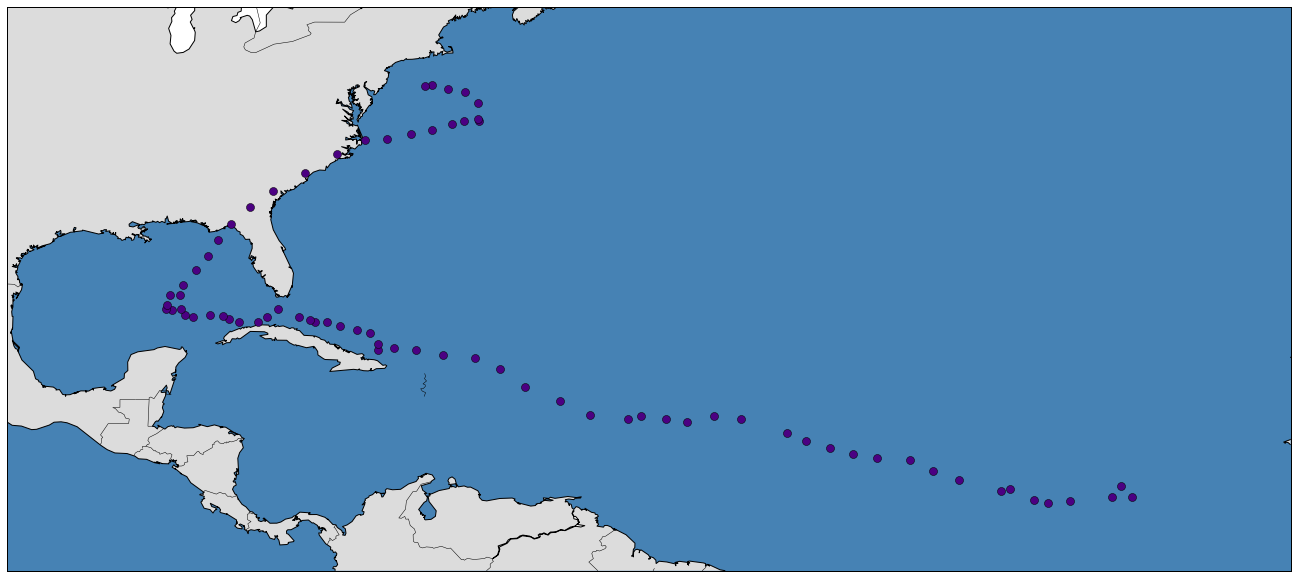

In [12]:
width = 23
height = 23
fig = plt.figure(figsize=(width, height));
themap = Basemap(projection='gall',
              llcrnrlon = min(lon)-10,              # lower-left corner longitude
              llcrnrlat = min(lat)-5,               # lower-left corner latitude
              urcrnrlon = max(lon)+10,               # upper-right corner longitude
              urcrnrlat = max(lat)+5,               # upper-right corner latitude
              resolution = 'l',
              area_thresh = 100000.0,
              );
themap.drawcoastlines();
themap.drawcountries();
themap.fillcontinents(color = 'gainsboro');
themap.drawmapboundary(fill_color='steelblue');

x, y = themap(lon,lat);

themap.plot(x, y, 
            'o',                    # marker shape
            c='indigo',         # marker colour
            markersize=8            # marker size
            );                    
plt.show();

In [ ]:
lowest_mslp = c.execute('SELECT date, id, lat, lon, fhr, mslp FROM atl WHERE mslp=(SELECT MIN(mslp) from atl where mslp >850);').fetchall()
print lowest_mslp